# **Initialization**

In [ ]:
%pip install opendatasets
%pip install kaggle

In [ ]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

{"username":"misiacallista","key":"fd69f215e563b4264953afa408002305"}

In [ ]:
od.download('https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016/code')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: misiacallista
Your Kaggle Key: ··········


100%|██████████| 397k/397k [00:00<00:00, 69.4MB/s]

In [ ]:
# Mengakses dara dari kaggle

df = pd.read_csv('suicide-rates-overview-1985-to-2016/master.csv')

In [ ]:
df = pd.read_csv('suicide-rates-overview-1985-to-2016/master.csv')

# **Data Understanding**

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
# Melihat info csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
# Cari null value -> banyak NULL value di HDI for year
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

# **Data Cleansing & Data Transformation**
1. Mengganti NaN value pada kolom HDI for year dengan rata-rata dari HDI for year
2. Memberikan definisi kelompok usia agar dataset lebih mudah dipahami
3. Mengubah tipe data gdp_for_year dari object ke int agar saat mengelompokkan data menjadi lebih mudah

In [ ]:
mean = df['HDI for year']. mean()
print(mean)
df['HDI for year'] = df['HDI for year'].fillna(mean)

0.7766011477761837


In [ ]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
def age_category(age):
  if(age == '5-14 years'):
    return 'Kids'
  elif(age == '15-24 years'):
    return 'Teens'
  elif(age == '25-34 years'):
    return 'Young Adult'
  elif(age == '35-54 years'):
    return 'Middle Age Adult'
  elif(age == '55-74 years'):
    return 'Old Adult'
  else:
    return 'Elderly'

In [ ]:
df['age_category'] = df['age'].apply(age_category)

In [ ]:
df = df.drop(columns = 'age')

In [ ]:
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,age_category
0,Albania,1987,male,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X,Teens
1,Albania,1987,male,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent,Middle Age Adult
2,Albania,1987,female,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X,Teens
3,Albania,1987,male,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation,Elderly
4,Albania,1987,male,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers,Young Adult


In [ ]:
def gdpforyear(gdp):
  gdp = gdp.replace(',', '')
  gdp = int(gdp)
  return gdp

In [ ]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].apply(gdpforyear)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   country-year        27820 non-null  object 
 7   HDI for year        27820 non-null  float64
 8    gdp_for_year ($)   27820 non-null  int64  
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
 11  age_category        27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [ ]:
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,age_category
0,Albania,1987,male,21,312900,6.71,Albania1987,0.776601,2156624900,796,Generation X,Teens
1,Albania,1987,male,16,308000,5.19,Albania1987,0.776601,2156624900,796,Silent,Middle Age Adult
2,Albania,1987,female,14,289700,4.83,Albania1987,0.776601,2156624900,796,Generation X,Teens
3,Albania,1987,male,1,21800,4.59,Albania1987,0.776601,2156624900,796,G.I. Generation,Elderly
4,Albania,1987,male,9,274300,3.28,Albania1987,0.776601,2156624900,796,Boomers,Young Adult


In [ ]:
numerical_column = df[['year', 'suicides_no', 'population', ' gdp_for_year ($) ', 'gdp_per_capita ($)']]
nonnumerical_column = df[['country', 'sex', 'suicides/100k pop', 'HDI for year', 'generation', 'age_category']]

# **Data Visualization**


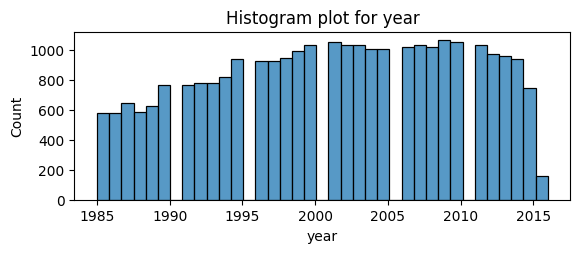

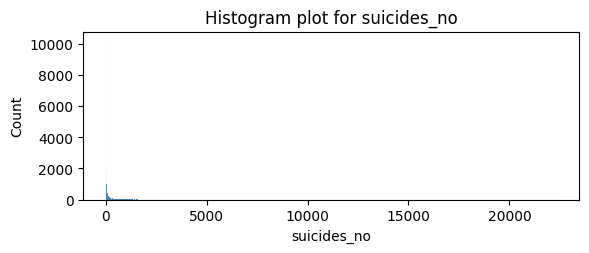

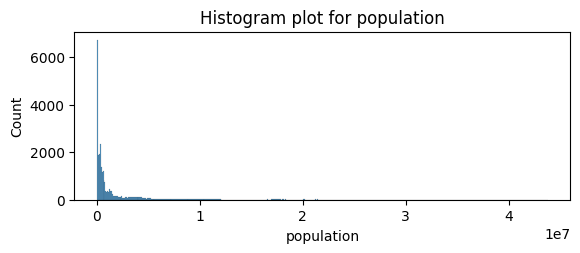

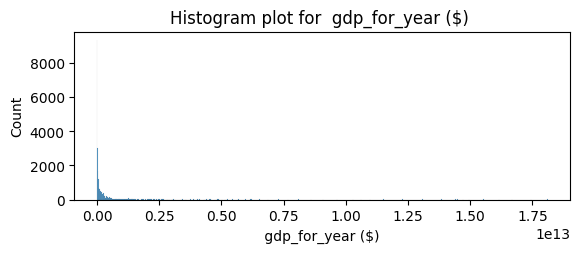

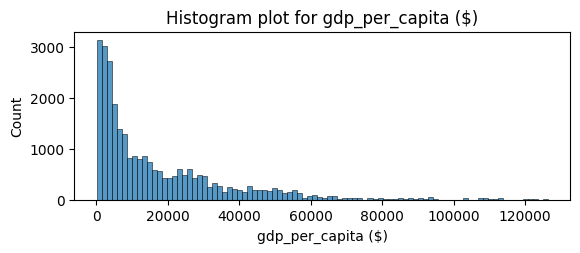

In [ ]:
for col in numerical_column:
  plt.subplot(2,1,1)
  sns.histplot(numerical_column[col])
  plt.title(f"Histogram plot for {col}")
  plt.show()

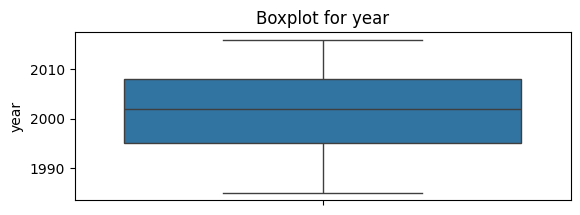

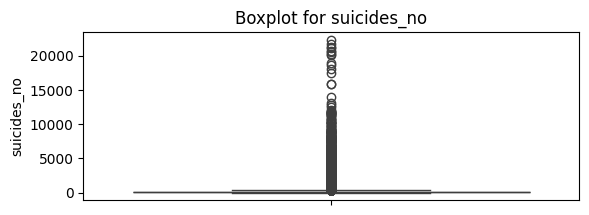

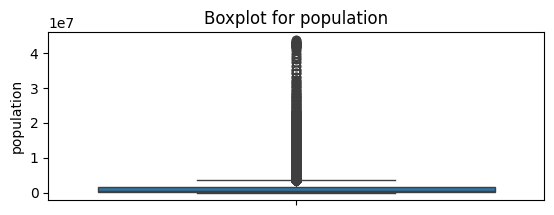

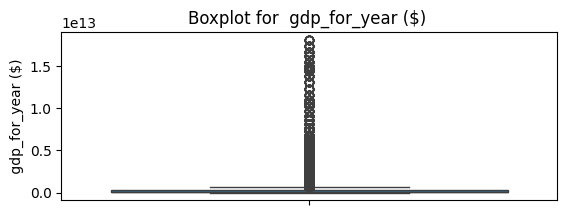

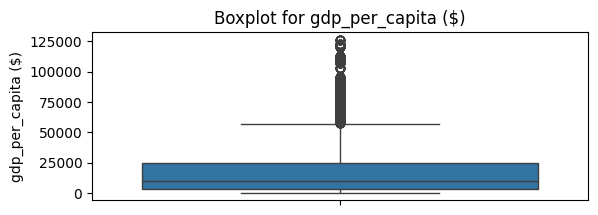

In [ ]:
for col in numerical_column:
  plt.subplot(2,1,1)
  sns.boxplot(numerical_column[col])
  plt.title(f"Boxplot for {col}")
  plt.show()

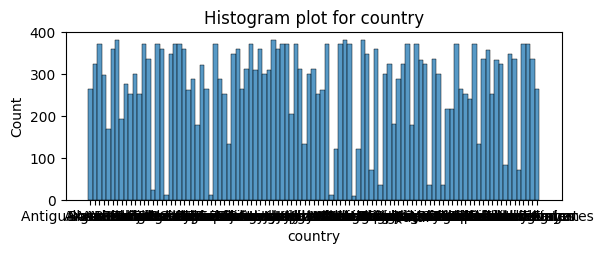

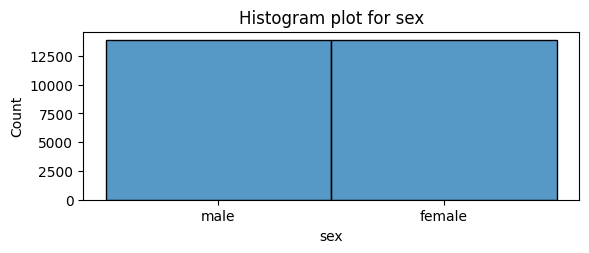

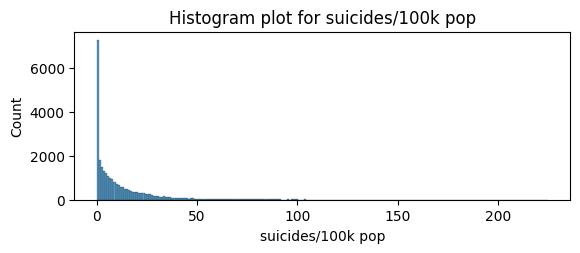

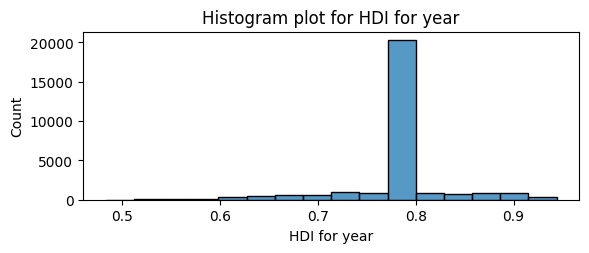

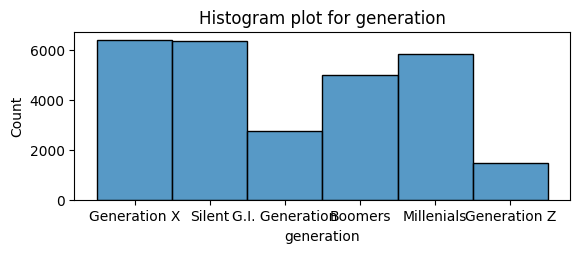

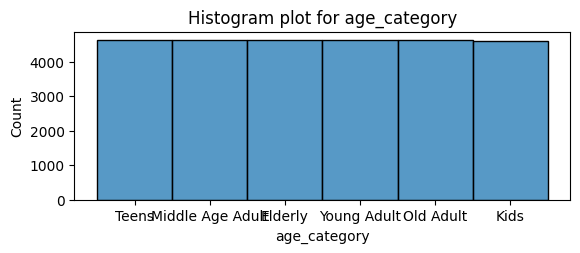

In [ ]:
for col in nonnumerical_column:
  plt.subplot(2,1,1)
  sns.histplot(nonnumerical_column[col])
  plt.title(f"Histogram plot for {col}")
  plt.show()

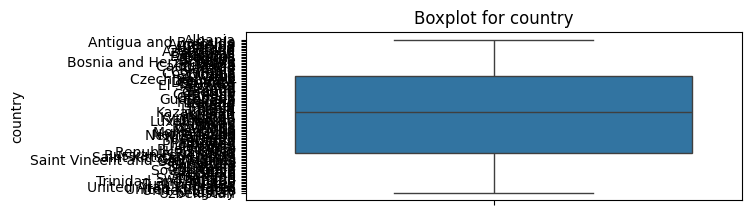

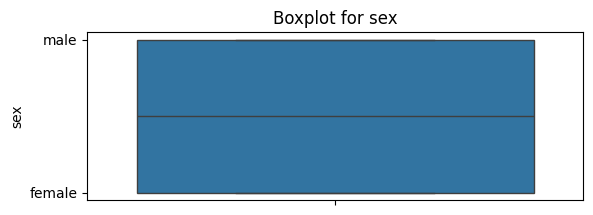

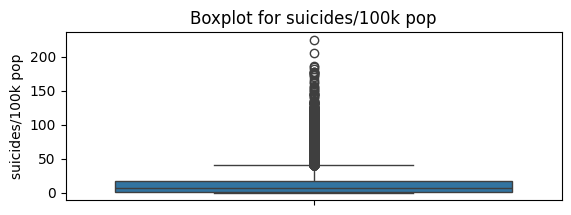

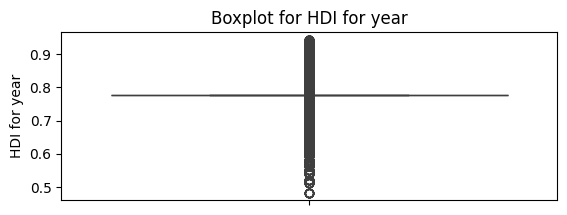

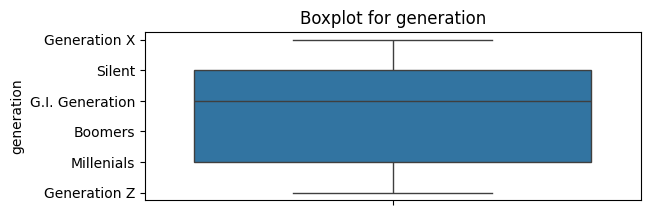

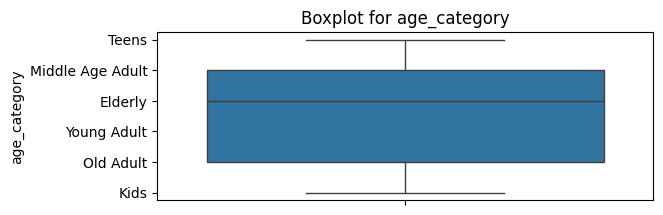

In [ ]:
for col in nonnumerical_column:
  plt.subplot(2,1,1)
  sns.boxplot(nonnumerical_column[col])
  plt.title(f"Boxplot for {col}")
  plt.show()

<Axes: >

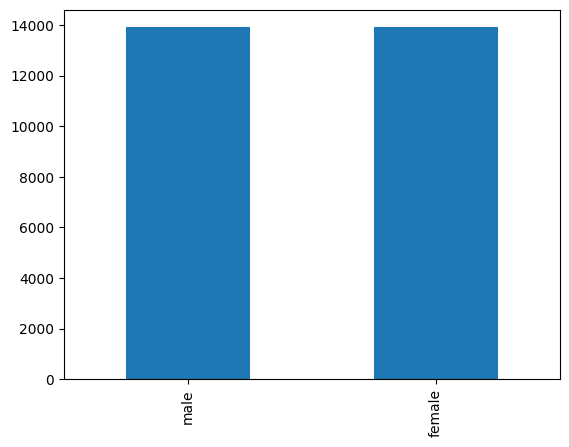

In [ ]:
df.sex.value_counts().plot.bar()

In [ ]:
country_list = list(df['country']. unique())

country_suicide_ratio = []
for i in country_list:
    x = df[df['country'] == i]
    y = sum(x.suicides_no)/len(x)
    country_suicide_ratio.append(y)

country_percapita_ratio = []
for i in country_list:
  x = df[df['country'] == i]
  df['gdp_per_capita'] = df['gdp_per_capita ($)']
  y = sum(df[df['country'] == 1].gdp_per_capita)/len(x)
  country_percapita_ratio.append(y)

data = pd.DataFrame({'country': country_list, 'country_suicide_ratio': country_suicide_ratio, 'country_percapita_ratio': country_percapita_ratio})

index = (data['country_suicide_ratio'].sort_values(ascending=False)).index.values
sort_data = data.reindex(index)
df = df.drop(columns = 'gdp_per_capita')

In [ ]:
data.head()

,country,country_suicide_ratio,country_percapita_ratio
0,Albania,7.462121,0.0
1,Antigua and Barbuda,0.033951,0.0
2,Argentina,221.018817,0.0
3,Armenia,6.392617,0.0
4,Aruba,0.601190,0.0


Text(0.5, 1.0, 'Suicide Rate of Countries')

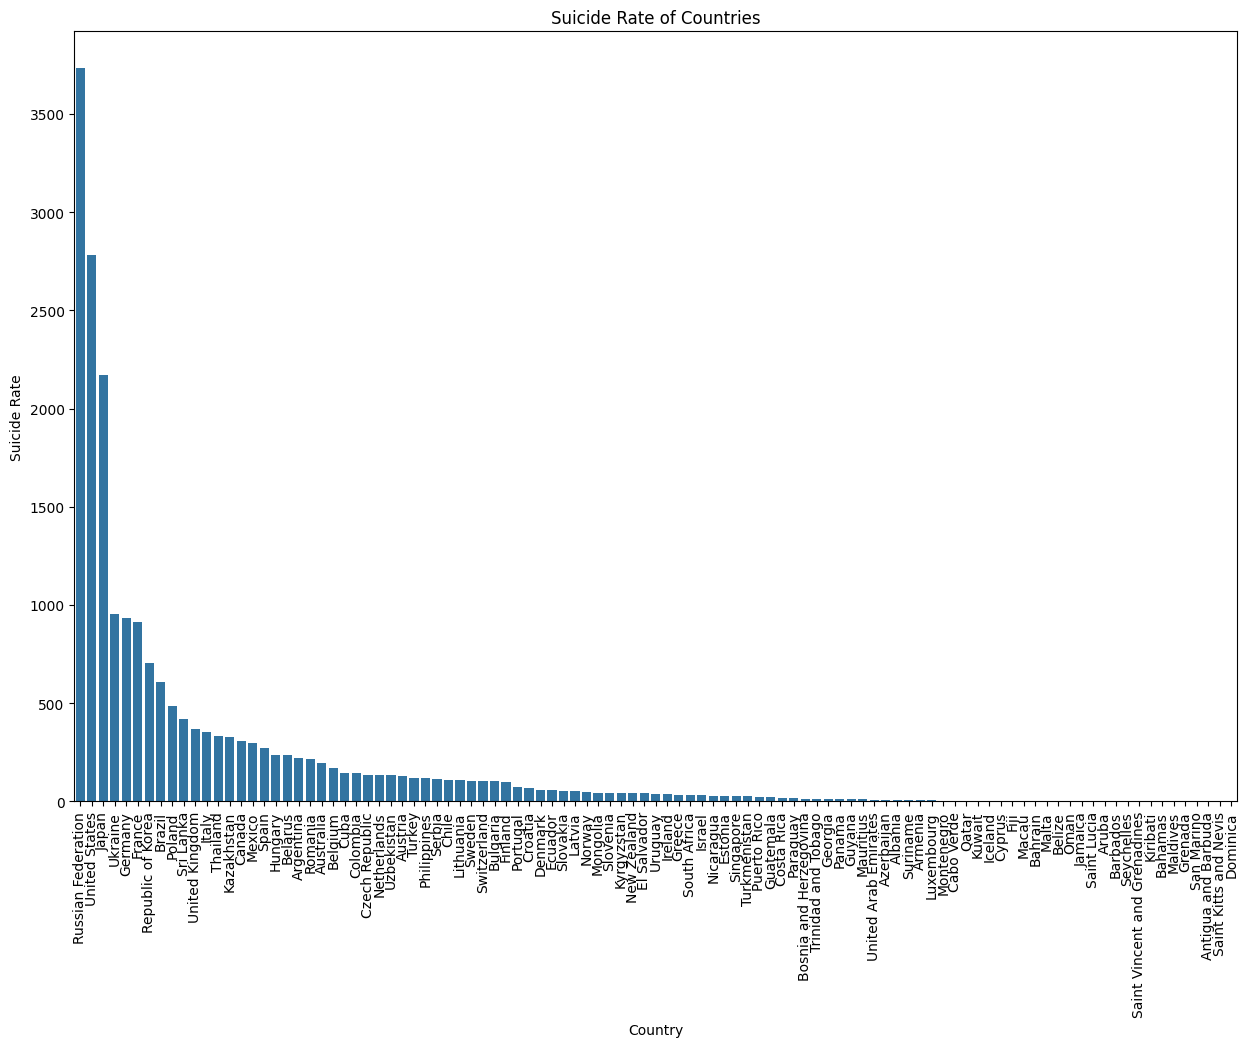

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=sort_data['country'], y=sort_data['country_suicide_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate of Countries')

Text(0.5, 1.0, 'Suicide Rate Per Capita')

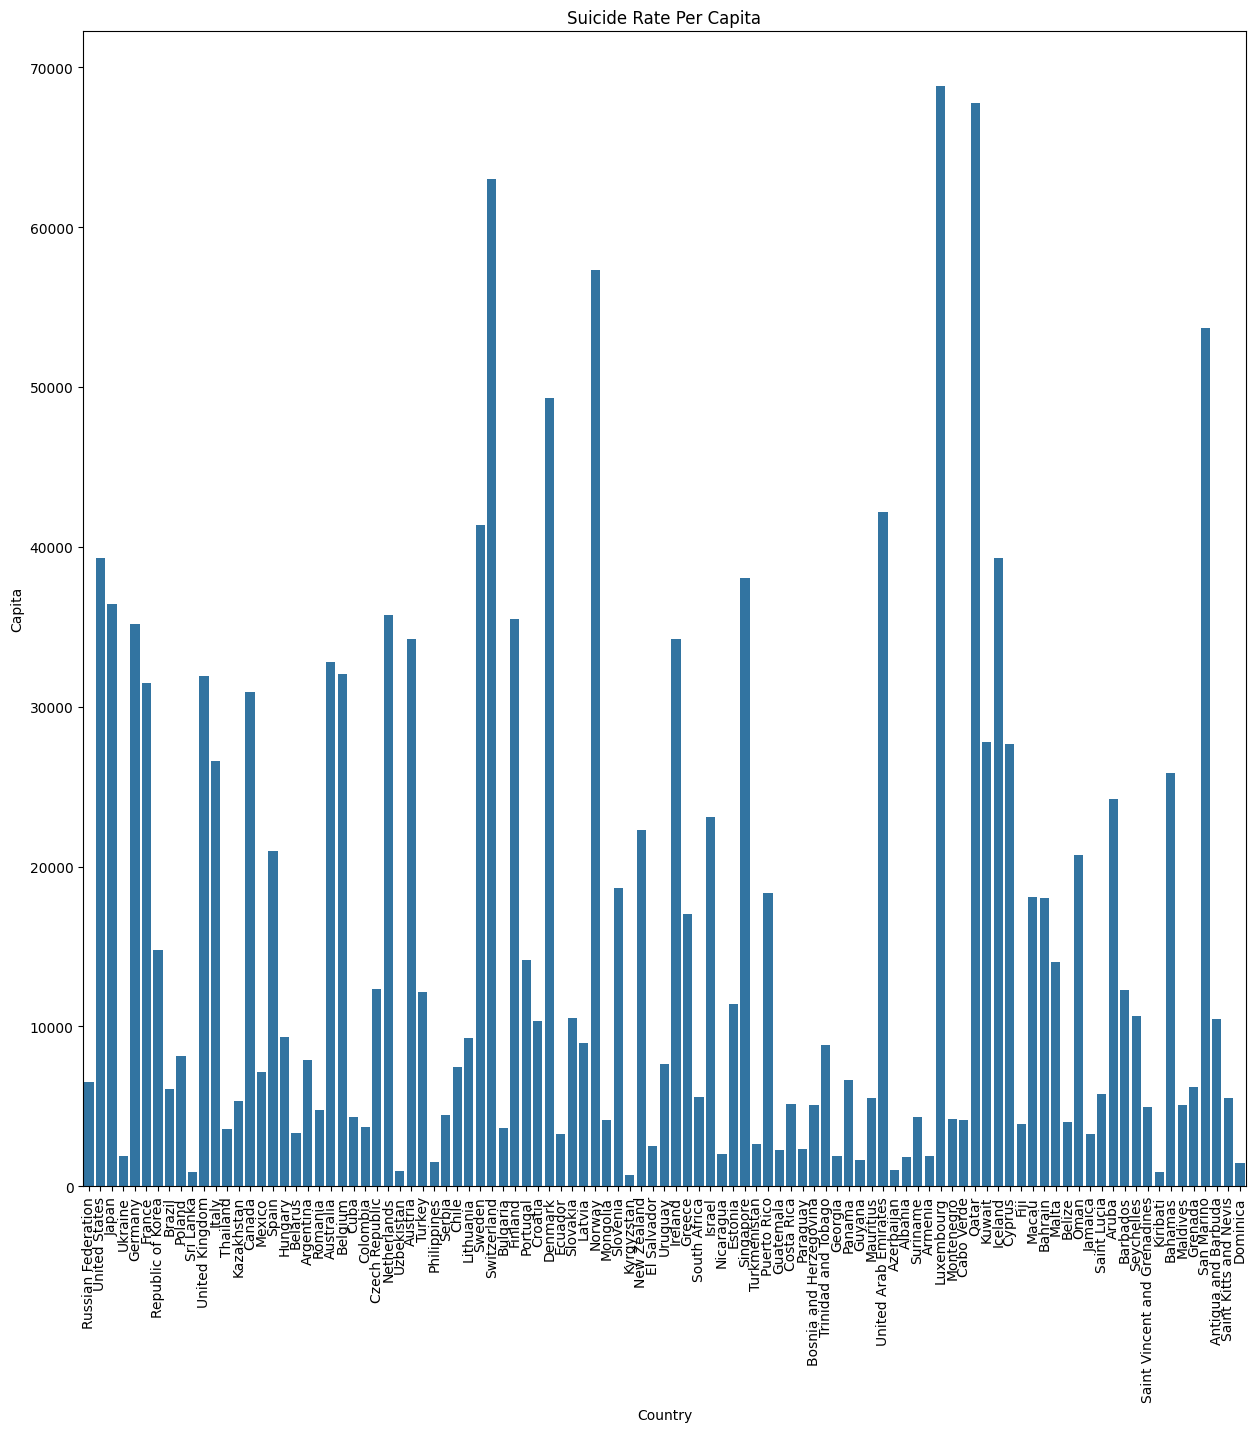

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=sort_data['country'], y=sort_data['country_percapita_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Capita')
plt.title('Suicide Rate Per Capita')
plt.show()

Heatmap


<ipython-input-28-9fc148991751>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


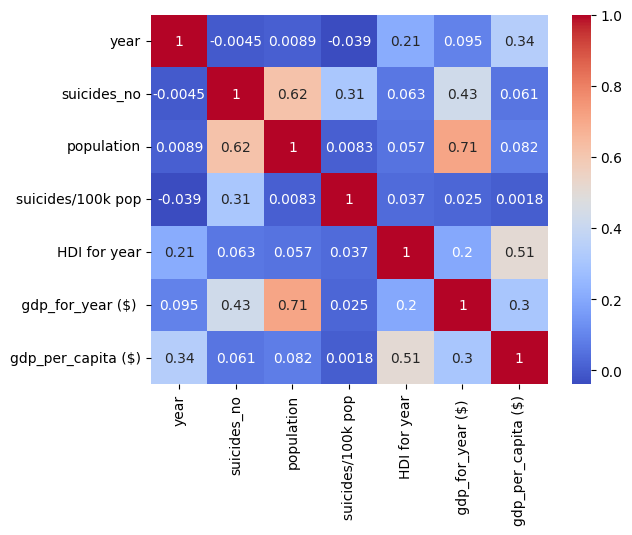

In [ ]:
#Visualisasi matrix korelasi
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()